In [122]:

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics

data = pd.read_csv('C:/Users/HOANG NAM/Desktop/cau2.csv')
data.head(20)

,giảm,người,chuyển,yêu,vừa,đi,Cảm xúc
0,0..5,11..20,>20,11..20,>20,0..5,tốt
1,11..20,6..10,6..10,0..5,11..20,11..20,tốt
2,6..10,0..5,6..10,11..20,0..5,6..10,xấu
3,>20,0..5,11..20,6..10,0..5,>20,bình thường
4,0..5,>20,11..20,0..5,6..10,0..5,xấu
5,0..5,6..10,0..5,0..5,11..20,11..20,xấu
6,0..5,6..10,11..20,0..5,6..10,0..5,tốt
7,11..20,>20,0..5,11..20,0..5,11..20,bình thường
8,0..5,0..5,6..10,6..10,6..10,>20,tốt
9,11..20,0..5,11..20,11..20,0..5,11..20,tốt


In [123]:
#Tách 3 dòng dữ liệu cuối dùng để dự đoán 
pre_data=data[14:18]
pre_data = pre_data.drop(['Cảm xúc'],axis=1)
data = data[0:14]
print(pre_data)

     giảm   người  chuyển     yêu     vừa     đi
14   0..5   6..10    0..5  11..20   6..10   0..5
15   0..5    0..5   6..10    0..5  11..20    >20
16  6..10    0..5  11..20     >20   6..10  6..10
17  6..10  11..20   6..10   6..10     >20   0..5


In [124]:
#chuyển cột 'cảm xúc' sang dạng one-hot
for i in range(0,14):
    if data['Cảm xúc'][i] =='tốt ': 
        data['Cảm xúc'][i]=2
    if data['Cảm xúc'][i] == "bình thường":
        data['Cảm xúc'][i]=1 
    if data['Cảm xúc'][i] == "xấu ":
        data['Cảm xúc'][i]=0
#Ép kiểu cột cảm xúc sang int
data['Cảm xúc']=pd.to_numeric(data['Cảm xúc'])
data.head(20)

,giảm,người,chuyển,yêu,vừa,đi,Cảm xúc
0,0..5,11..20,>20,11..20,>20,0..5,2
1,11..20,6..10,6..10,0..5,11..20,11..20,2
2,6..10,0..5,6..10,11..20,0..5,6..10,0
3,>20,0..5,11..20,6..10,0..5,>20,1
4,0..5,>20,11..20,0..5,6..10,0..5,0
5,0..5,6..10,0..5,0..5,11..20,11..20,0
6,0..5,6..10,11..20,0..5,6..10,0..5,2
7,11..20,>20,0..5,11..20,0..5,11..20,1
8,0..5,0..5,6..10,6..10,6..10,>20,2
9,11..20,0..5,11..20,11..20,0..5,11..20,2


In [125]:
#Tách các cột dữ liệu thành hai phần, một phần chứa các thuộc tính bình thường, một
#phần chứa riêng thuộc tính quyết định.
features = data.drop( 'Cảm xúc' , axis=1)
labels = data[ 'Cảm xúc' ]


In [126]:
features.select_dtypes(exclude=['int64']).columns

Index(['giảm', 'người', 'chuyển', 'yêu', 'vừa', 'đi'], dtype='object')

In [127]:
#Chuyển đổi các cột không phải dạng số về dạng one-hot vector
features_onehot=pd.get_dummies ( features , columns =features.select_dtypes(exclude=['int64']).columns)
features_onehot


,giảm_0..5,giảm_11..20,giảm_6..10,giảm_>20,người_0..5,người_11..20,người_6..10,người_>20,chuyển_0..5,chuyển_11..20,...,yêu_6..10,yêu_>20,vừa_0..5,vừa_11..20,vừa_6..10,vừa_>20,đi_0..5,đi_11..20,đi_6..10,đi_>20
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,1,1,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,1,0,0,0
5,1,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0
6,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,1,0,0,0
7,0,1,0,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,1,0,0
8,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
9,0,1,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [137]:
#Tách các dòng dữ liệu ra thành hai phần huấn luyện và kiểm thử như ban đầu.
X_train = features_onehot[: 8] 
X_test = features_onehot[8:] 
y_train = labels[ :8]
y_test = labels[8:]

In [138]:
#Xây dựng cây ID3
clf=tree.DecisionTreeClassifier(criterion="entropy", random_state=0) 
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [139]:
#áp dụng mô hình trên dữ liệu kiểm thử.
tree_pred = clf.predict(X_test)
tree_score=metrics.accuracy_score(y_test, tree_pred) 
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test, tree_pred))


Accuracy: 0.3333333333333333
Report:               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.00      0.00      0.00         2
           2       0.50      0.50      0.50         2

    accuracy                           0.33         6
   macro avg       0.33      0.33      0.33         6
weighted avg       0.33      0.33      0.33         6



In [140]:
#ma trận nhầm lẫn
tree_cm = metrics.confusion_matrix(y_test,tree_pred)

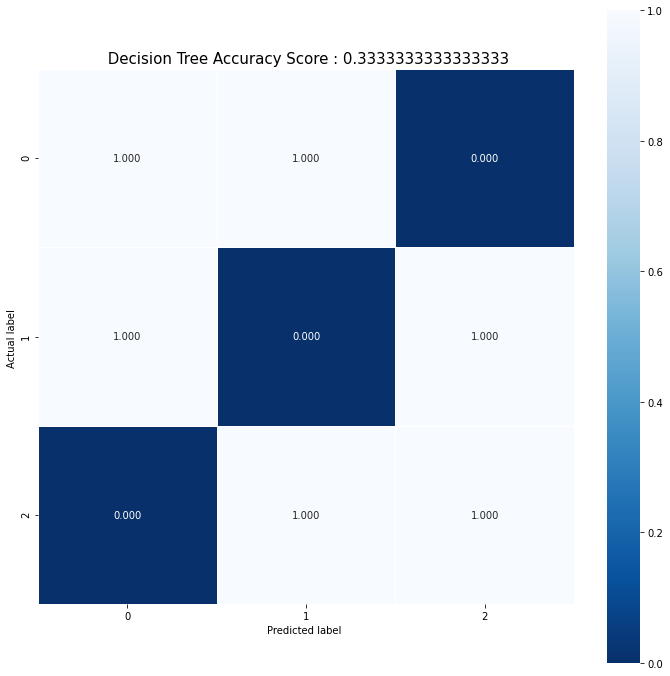

In [141]:
#biểu diễn ma trận nhầm lẫn lên đồ thị heatmap
plt.figure(figsize=(12,12))
sns. heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r' );
plt.ylabel('Actual label '); 
plt.xlabel('Predicted label ') ;
title = ' Decision Tree Accuracy Score : {0}'.format(tree_score)
plt.title(title, size = 15);


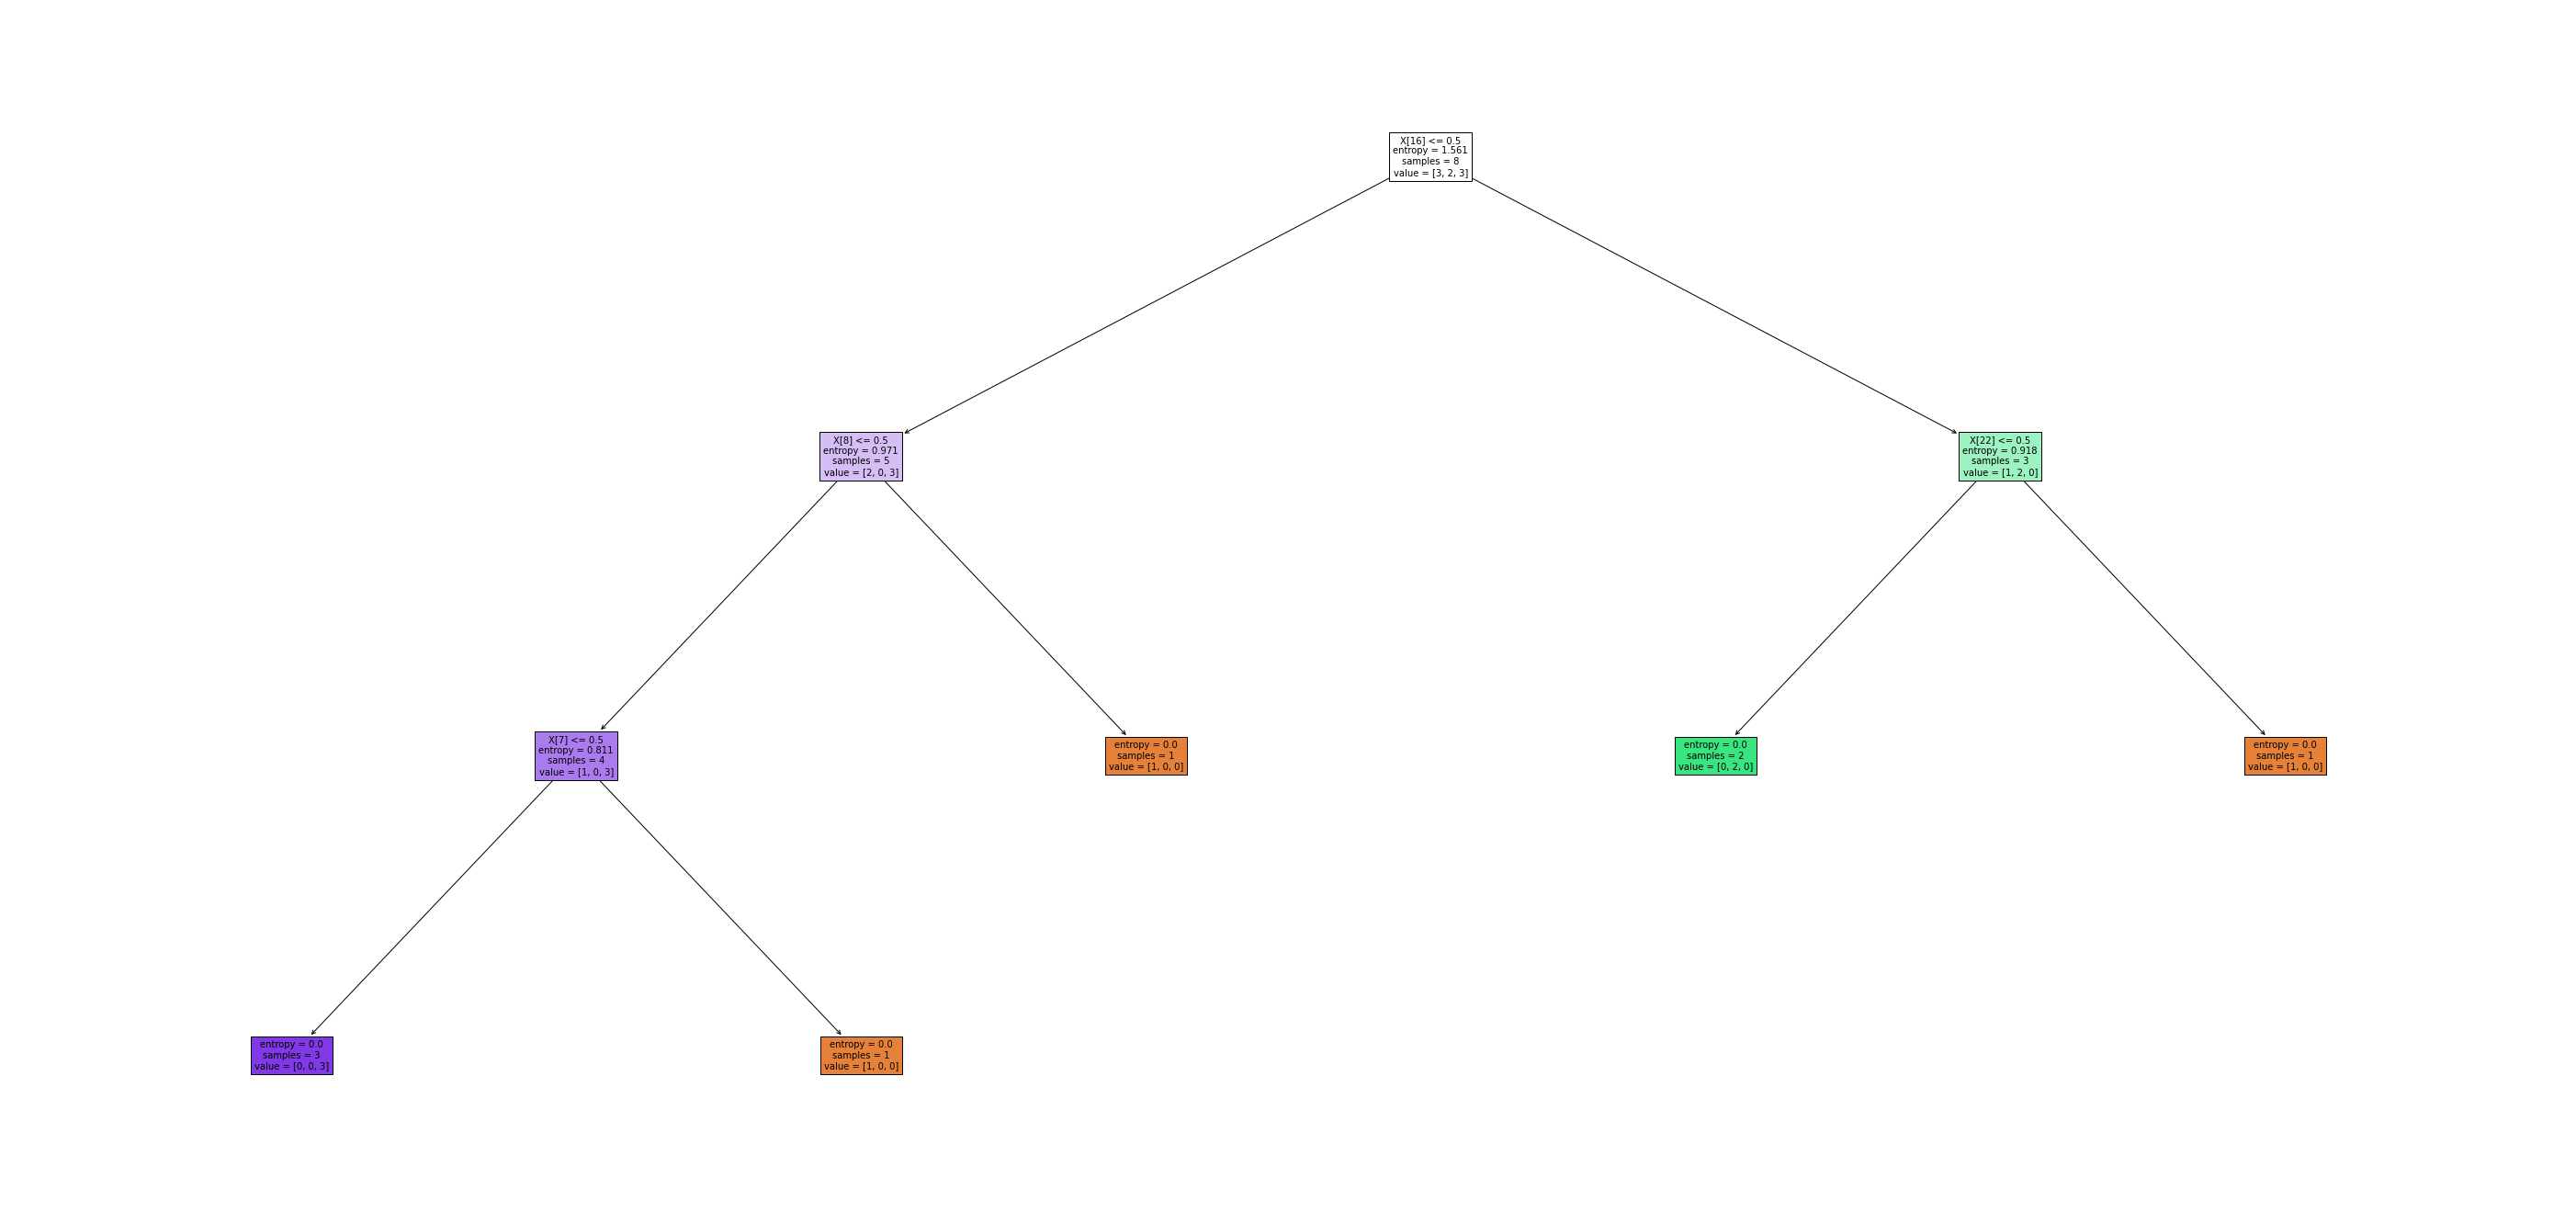

In [142]:
#vẽ cây ID3
fig, ax = plt. subplots(figsize=(50, 24))
tree.plot_tree(clf, filled=True, fontsize=10) 
plt.savefig(' decision tree', dpi=100)
plt.show()

In [143]:
#Xây dựng cây CART
clf=tree.DecisionTreeClassifier(criterion="gini", random_state=0) 
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [144]:
#áp dụng mô hình trên dữ liệu kiểm thử.
tree_pred = clf.predict(X_test)
tree_score=metrics.accuracy_score(y_test, tree_pred) 
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test, tree_pred))


Accuracy: 0.3333333333333333
Report:               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.00      0.00      0.00         2
           2       0.50      0.50      0.50         2

    accuracy                           0.33         6
   macro avg       0.33      0.33      0.33         6
weighted avg       0.33      0.33      0.33         6



In [145]:
#ma trận nhầm lẫn
tree_cm = metrics.confusion_matrix(y_test,tree_pred)

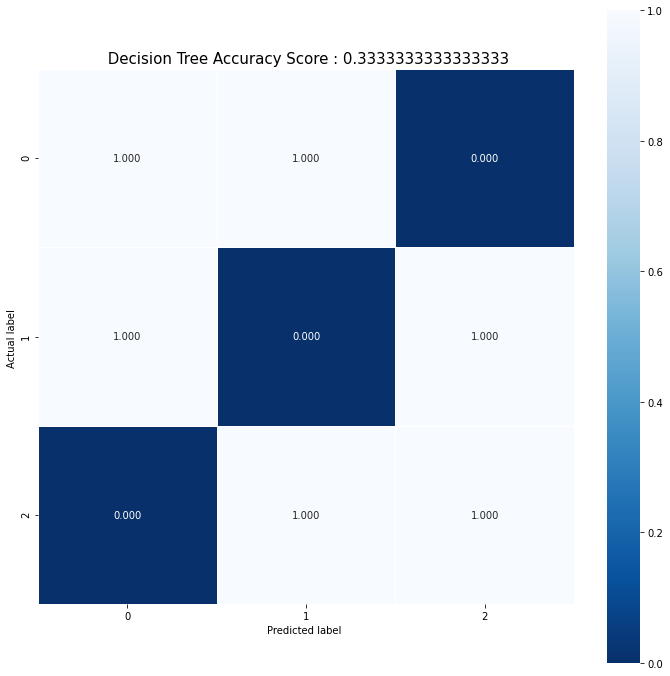

In [146]:
#biểu diễn ma trận nhầm lẫn lên đồ thị heatmap
plt.figure(figsize=(12,12))
sns. heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r' );
plt.ylabel('Actual label '); 
plt.xlabel('Predicted label ') ;
title = ' Decision Tree Accuracy Score : {0}'.format(tree_score)
plt.title(title, size = 15);

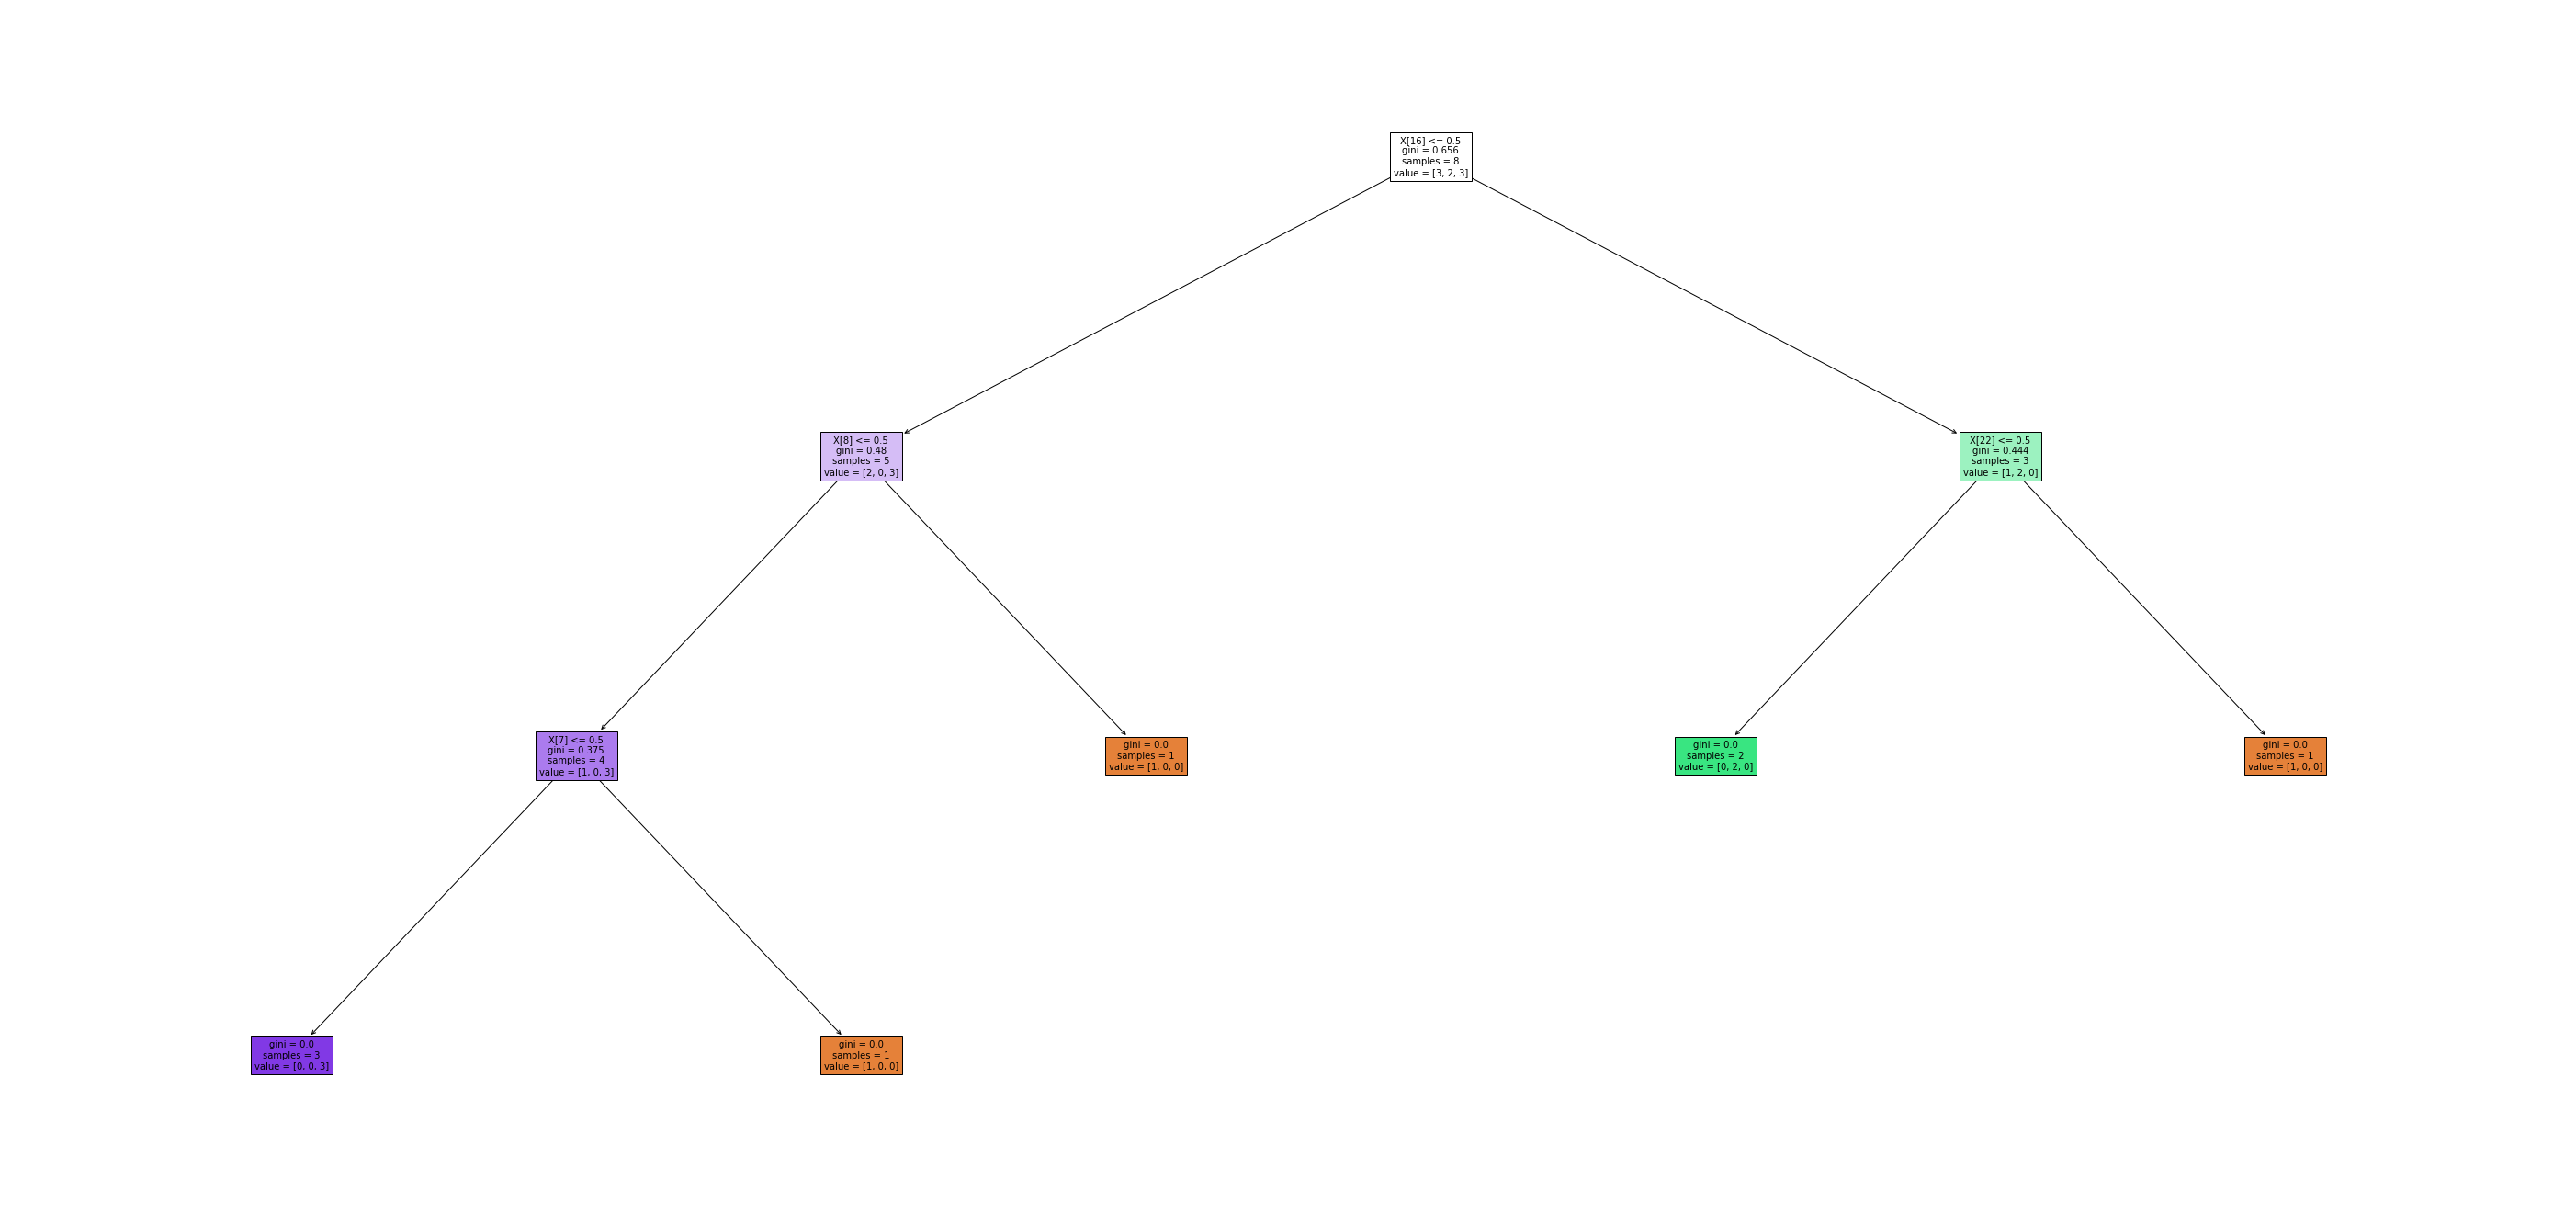

In [147]:
#vẽ cây ID3
fig, ax = plt. subplots(figsize=(50, 24))
tree.plot_tree(clf, filled=True, fontsize=10) 
plt.savefig(' decision tree', dpi=100)
plt.show()

In [153]:
#Dự đoán 3 mẫu dữ liệu câu d
feat_onehot=pd.get_dummies ( pre_data , columns =pre_data.select_dtypes(exclude=['int64']).columns)
print(feat_onehot)
feat_onehot['giảm_>20'] = 0
feat_onehot['giảm_11..20'] = 0
feat_onehot['người_>20'] = 0
feat_onehot['chuyển_>20'] = 0
feat_onehot['vừa_0..5'] = 0
feat_onehot['đi_11..20'] = 0
pred = clf.predict(feat_onehot)
print(pred)

    giảm_0..5  giảm_6..10  người_0..5  người_11..20  người_6..10  chuyển_0..5  \
14          1           0           0             0            1            1   
15          1           0           1             0            0            0   
16          0           1           1             0            0            0   
17          0           1           0             1            0            0   

    chuyển_11..20  chuyển_6..10  yêu_0..5  yêu_11..20  yêu_6..10  yêu_>20  \
14              0             0         0           1          0        0   
15              0             1         1           0          0        0   
16              1             0         0           0          0        1   
17              0             1         0           0          1        0   

    vừa_11..20  vừa_6..10  vừa_>20  đi_0..5  đi_6..10  đi_>20  
14           0          1        0        1         0       0  
15           1          0        0        0         0       1  
16           0  

Accuracy: 0.25
Report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         2

    accuracy                           0.25         4
   macro avg       0.33      0.33      0.33         4
weighted avg       0.25      0.25      0.25         4



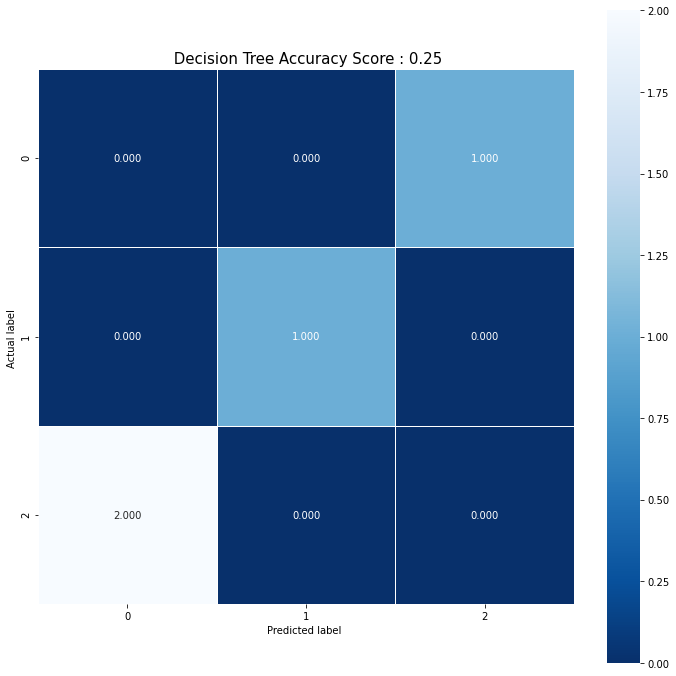

In [156]:
#câu e
#áp dụng mô hình trên dữ liệu kiểm thử.
y_test_pred=[0, 2, 1,2]
tree_score=metrics.accuracy_score(y_test_pred, pred) 
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test_pred,pred))
#biểu diễn ma trận nhầm lẫn lên đồ thị heatmap
tree_cm = metrics.confusion_matrix(y_test_pred,pred)
plt.figure(figsize=(12,12))
sns. heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r' );
plt.ylabel('Actual label '); 
plt.xlabel('Predicted label ') ;
title = ' Decision Tree Accuracy Score : {0}'.format(tree_score)
plt.title(title, size = 15);

In [157]:
#Xây dựng mô hình phân lớp bằng thuật toán Naïve Bayes
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train, y_train).predict(X_test)


In [158]:
#Tính toán các giá trị của mô hình
bayes_score = metrics.accuracy_score(y_test, bayes_pred) 
print("Accuracy", bayes_score)
print("Report:", metrics.classification_report(y_test, bayes_pred))


Accuracy 0.16666666666666666
Report:               precision    recall  f1-score   support

           0       0.25      0.50      0.33         2
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2

    accuracy                           0.17         6
   macro avg       0.08      0.17      0.11         6
weighted avg       0.08      0.17      0.11         6



Text(0.5, 1.0, 'Naive Bayes Accuracy: 0.16666666666666666')

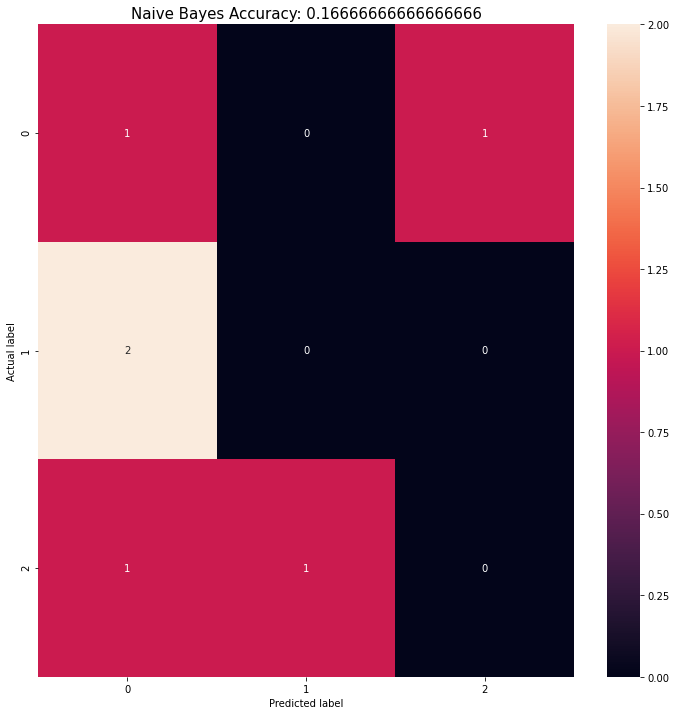

In [159]:
#ma trận nhầm lẫn bằng đồ thị heatmap.
bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)
fig = plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm, annot=True, fmt=".0f"); 
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Naive Bayes Accuracy: {0}'.format(bayes_score) 
plt.title(title,size=15)
